<a href="https://colab.research.google.com/github/sexymonster/Dacon/blob/main/project_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 인트로

## 1.1 문제 유형 및 데이터 정리

<코드 링크>https://dacon.io/competitions/open/235536/overview/description

1. movies_train.csv / movies_test.csv\
title : 영화의 제목\
distributor : 배급사\
genre : 장르\
release_time : 개봉일\
time : 상영시간(분)\
screening_rat : 상영등급\
director : 감독이름\
dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)\
dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)\
num_staff : 스텝수\
num_actor : 주연배우수\
box_off_num : 관객수

2.  submission.csv (제출 파일 형식)

<데이터 상세 설명>
2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터

## 1.2 패키지 로드

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler #표준화
from sklearn.preprocessing import MinMaxScaler #정규화
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

##1.3 데이터 로드

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/MOVIE/NumofAudi/'

df_train = pd.read_csv(path + 'movies_train.csv')
df_test = pd.read_csv(path + 'movies_test.csv')
df_sub = pd.read_csv(path + 'submission.csv')

In [ ]:
df_train.head(20)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


In [ ]:
df_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
df_sub.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


# 2. 전처리

In [ ]:
print("배급사 수 : ", len(df_train.distributor.unique()))
print("장르 수 : ", len(df_train.genre.unique()))
print("상영등급 수 : ", len(df_train.screening_rat.unique()))
print("감독 수 : ", len(df_train.director.unique()))

배급사 수 :  169
장르 수 :  12
상영등급 수 :  4
감독 수 :  472


관객수 관련도 확인

In [ ]:
df_train.corr().box_off_num

time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
Name: box_off_num, dtype: float64

## 2.1 배급사 전처리

In [ ]:
data = pd.concat([df_train,df_test])
data.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
238,해에게서 소년에게,디씨드,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,NaN
239,울보 권투부,인디스토리,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,(주)컨텐츠온미디어,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,(주)씨타마운틴픽쳐스,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,NaN
242,조선안방 스캔들-칠거지악 2,(주) 케이알씨지,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4,NaN


In [ ]:
dis_size = data.distributor.value_counts()
dis_size.head(15)

CJ 엔터테인먼트    85
롯데엔터테인먼트     76
(주)마운틴픽쳐스    43
(주)쇼박스       38
인디스토리        37
(주)NEW       36
골든타이드픽처스     27
(주) 케이알씨지    19
(주)키노아이      15
KT&G 상상마당    14
시네마달         13
어뮤즈          13
인벤트 디        12
NEW          12
영화사 진진       12
Name: distributor, dtype: int64

In [ ]:
data.distributor.unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [ ]:
for i in range(843):
  data.distributor.iloc[i] =dis_size[data.distributor.iloc[i]]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<BarContainer object of 843 artists>

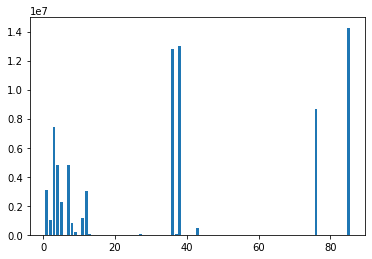

In [ ]:
plt.bar(data.distributor,data.box_off_num)

In [ ]:
for i in range(843):
  if data.distributor.iloc[i] == 43:
    data.distributor.iloc[i] = 10

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
238,해에게서 소년에게,1,드라마,2015-11-19,78,15세 관람가,안슬기,2590.0,1,4,4,NaN
239,울보 권투부,37,다큐멘터리,2015-10-29,86,12세 관람가,이일하,NaN,0,18,2,NaN
240,어떤살인,1,느와르,2015-10-28,107,청소년 관람불가,안용훈,NaN,0,224,4,NaN
241,말하지 못한 비밀,1,드라마,2015-10-22,102,청소년 관람불가,송동윤,50699.0,1,68,7,NaN
242,조선안방 스캔들-칠거지악 2,19,멜로/로맨스,2015-10-22,76,청소년 관람불가,이전,NaN,0,10,4,NaN


In [ ]:
data_train = data.iloc[:600,:]
data_test = data.iloc[600:,:-1]

<BarContainer object of 600 artists>

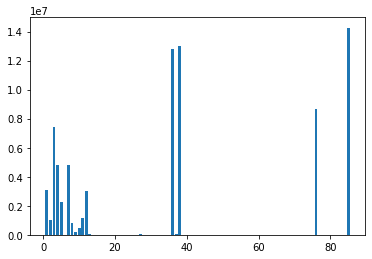

In [ ]:
plt.bar(data_train.distributor,data_train.box_off_num)

In [ ]:
data_train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,36,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091.0
596,파파로티,38,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438.0
597,살인의 강,10,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475.0
598,악의 연대기,85,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525.0
599,베를린,85,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532.0


In [ ]:
data_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,7,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,38,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,85,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,38,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,85,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


## 2.2 장르, 상영등급 원핫인코딩

In [ ]:
data_train = pd.concat([data_train, pd.get_dummies(data_train["genre"])], axis =1)
data_train = pd.concat([data_train, pd.get_dummies(data_train["screening_rat"])], axis =1)
data_train.drop(["genre","screening_rat"],axis=1,inplace=True)

data_test = pd.concat([data_test, pd.get_dummies(data_test["genre"])], axis =1)
data_test = pd.concat([data_test, pd.get_dummies(data_test["screening_rat"])], axis =1)
data_test.drop(["genre","screening_rat"],axis=1,inplace=True)


In [ ]:
data_train.head()

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가
0,개들의 전쟁,76,2012-11-22,96,조병옥,NaN,0,91,2,23398.0,...,0,0,0,0,1,0,0,0,0,1
1,내부자들,38,2015-11-19,130,우민호,1161602.50,2,387,3,7072501.0,...,0,0,0,0,0,0,0,0,0,1
2,은밀하게 위대하게,38,2013-06-05,123,장철수,220775.25,4,343,4,6959083.0,...,0,0,0,0,1,0,0,1,0,0
3,나는 공무원이다,36,2012-07-12,101,구자홍,23894.00,2,20,6,217866.0,...,0,0,0,0,0,1,0,0,1,0
4,불량남녀,4,2010-11-04,108,신근호,1.00,1,251,2,483387.0,...,0,0,0,0,0,1,0,1,0,0


##2.3 dir_prev_bfnum 결측치 처리

In [ ]:
data_train = data_train.fillna(0)

data_test = data_test.fillna(0)

## 2.4 release_time 처리

In [ ]:
data_train["release_year"] = data_train.release_time.apply(lambda x : int(x.split("-")[0]))

data_test["release_year"] = data_test.release_time.apply(lambda x : int(x.split("-")[0]))

In [ ]:
data_train.head(10)

,title,distributor,release_time,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,...,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,release_year
0,개들의 전쟁,76,2012-11-22,96,조병옥,0.00,0,91,2,23398.0,...,0,0,0,1,0,0,0,0,1,2012
1,내부자들,38,2015-11-19,130,우민호,1161602.50,2,387,3,7072501.0,...,0,0,0,0,0,0,0,0,1,2015
2,은밀하게 위대하게,38,2013-06-05,123,장철수,220775.25,4,343,4,6959083.0,...,0,0,0,1,0,0,1,0,0,2013
3,나는 공무원이다,36,2012-07-12,101,구자홍,23894.00,2,20,6,217866.0,...,0,0,0,0,1,0,0,1,0,2012
4,불량남녀,4,2010-11-04,108,신근호,1.00,1,251,2,483387.0,...,0,0,0,0,1,0,1,0,0,2010
5,강철대오 : 구국의 철가방,76,2012-10-25,113,육상효,837969.00,2,262,4,233211.0,...,0,0,0,0,1,0,1,0,0,2012
6,길위에서,2,2013-05-23,104,이창재,0.00,0,32,5,53526.0,...,0,0,0,0,0,0,0,1,0,2013
7,회사원,38,2012-10-11,96,임상윤,739522.00,3,342,2,1110523.0,...,0,0,0,1,0,0,0,0,1,2012
8,"1789, 바스티유의 연인들",1,2014-09-18,129,정성복,0.00,0,3,5,4778.0,...,0,0,0,0,0,0,0,1,0,2014
9,청춘그루브,2,2012-03-15,94,변성현,0.00,0,138,3,868.0,...,0,0,0,0,0,0,1,0,0,2012


In [ ]:
data_train.drop("release_time",axis=1)

data_test.drop("release_time",axis=1)

,title,distributor,time,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,SF,공포,...,미스터리,서스펜스,애니메이션,액션,코미디,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,release_year
0,용서는 없다,7,125,김형준,3.005290e+05,2,304,3,0,0,...,0,0,0,0,0,0,0,0,1,2010
1,아빠가 여자를 좋아해,38,113,이광재,3.427002e+05,4,275,3,0,0,...,0,0,0,0,0,1,0,0,0,2010
2,하모니,85,115,강대규,4.206611e+06,3,419,7,0,0,...,0,0,0,0,0,1,0,0,0,2010
3,의형제,38,116,장훈,6.913420e+05,2,408,2,0,0,...,0,0,0,1,0,0,1,0,0,2010
4,평행 이론,85,110,권호영,3.173800e+04,1,380,1,0,1,...,0,0,0,0,0,0,1,0,0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,해에게서 소년에게,1,78,안슬기,2.590000e+03,1,4,4,0,0,...,0,0,0,0,0,0,1,0,0,2015
239,울보 권투부,37,86,이일하,0.000000e+00,0,18,2,0,0,...,0,0,0,0,0,1,0,0,0,2015
240,어떤살인,1,107,안용훈,0.000000e+00,0,224,4,0,0,...,0,0,0,0,0,0,0,0,1,2015
241,말하지 못한 비밀,1,102,송동윤,5.069900e+04,1,68,7,0,0,...,0,0,0,0,0,0,0,0,1,2015


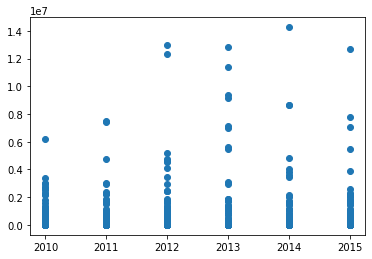

In [ ]:
plt.scatter(data_train.release_year,data_train.box_off_num)

In [ ]:
data_train.corr().box_off_num

distributor       0.342420
time              0.441452
dir_prev_bfnum    0.293791
dir_prev_num      0.259674
num_staff         0.544265
num_actor         0.111179
box_off_num       1.000000
SF                0.088009
공포               -0.017627
느와르               0.184869
다큐멘터리            -0.150310
드라마              -0.034488
멜로/로맨스           -0.059728
뮤지컬              -0.035211
미스터리             -0.016888
서스펜스             -0.019807
애니메이션            -0.054872
액션                0.181191
코미디               0.082780
12세 관람가           0.033896
15세 관람가           0.210368
전체 관람가           -0.133525
청소년 관람불가         -0.135180
release_year     -0.002497
Name: box_off_num, dtype: float64

## 2.5 관련성 있는 컬럼 추출

관련도가 0.1이상인 컬럼:\
"time","dir_prev_bfnum","dir_prev_num","num_staff","num_actor","느와르","다큐멘터리","액션","15세 관람가","전체 관람가","청소년 관람불가"

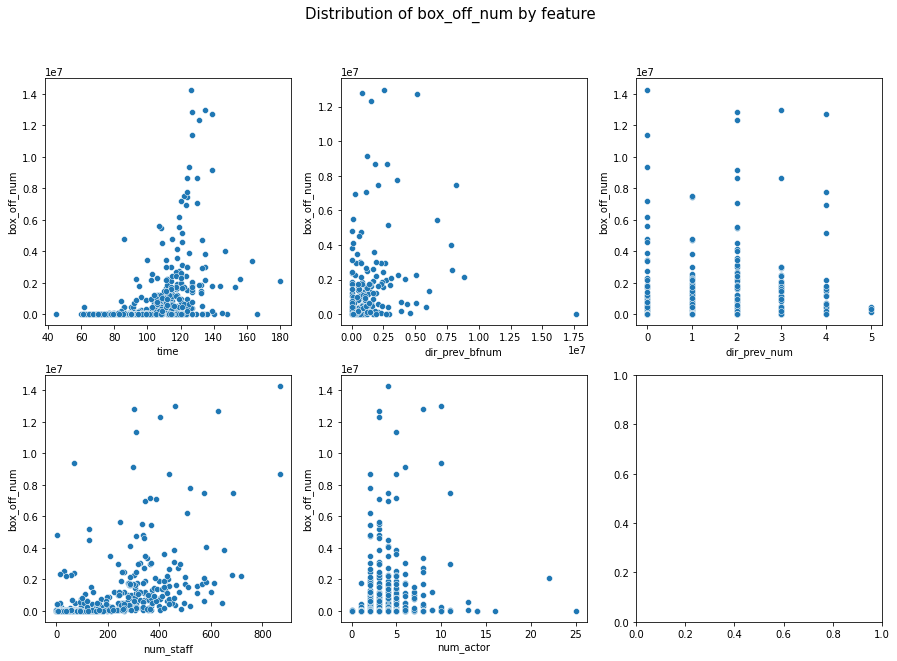

In [ ]:
fig, axes = plt.subplots(2, 3,figsize=(15,10))

sns.scatterplot(x = 'time', y = 'box_off_num',data = df_train, ax = axes[0][0])
sns.scatterplot(x = 'dir_prev_bfnum', y = 'box_off_num',data = df_train, ax = axes[0][1])
sns.scatterplot(x = 'dir_prev_num', y = 'box_off_num',data = df_train, ax = axes[0][2])
sns.scatterplot(x = 'num_staff', y = 'box_off_num',data = df_train, ax = axes[1][0])
sns.scatterplot(x = 'num_actor', y = 'box_off_num',data = df_train, ax = axes[1][1])

plt.suptitle("Distribution of box_off_num by feature",fontsize=15,va='top',ha='center')
plt.show()

In [ ]:
data_train1 = data_train[["time","dir_prev_bfnum","dir_prev_num","num_staff","num_actor","느와르","다큐멘터리","액션","15세 관람가","전체 관람가","청소년 관람불가","box_off_num"]]

data_test1 = data_test[["time","dir_prev_bfnum","dir_prev_num","num_staff","num_actor","느와르","다큐멘터리","액션","15세 관람가","전체 관람가","청소년 관람불가"]]

In [ ]:
data_train2 = data_train[["time","dir_prev_bfnum","dir_prev_num","num_staff","num_actor","box_off_num"]]

data_test2 = data_test[["time","dir_prev_bfnum","dir_prev_num","num_staff","num_actor"]]

## 2.6 이상치 처리

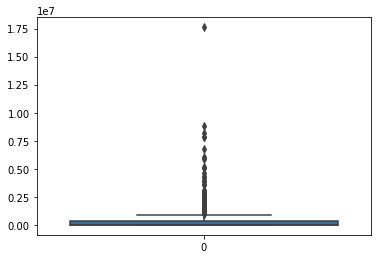

In [ ]:
sns.boxplot(data = data_train1["dir_prev_bfnum"])

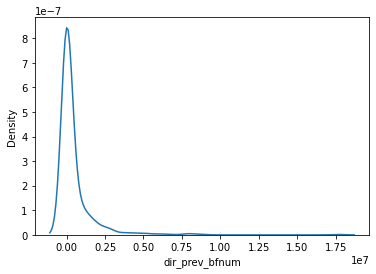

In [ ]:
sns.kdeplot(data_train1["dir_prev_bfnum"])

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [ ]:
(outlier_idx)

90

In [ ]:
outlier_idx = get_outlier(df=data_train1, column='dir_prev_bfnum', weight=1.5)
data_train1.drop(outlier_idx, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#3. 학습 & 예측

In [ ]:
data_train1.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,느와르,다큐멘터리,액션,15세 관람가,전체 관람가,청소년 관람불가,box_off_num
0,96,0.00,0,91,2,0,0,1,0,0,1,23398.0
2,123,220775.25,4,343,4,0,0,1,1,0,0,6959083.0
3,101,23894.00,2,20,6,0,0,0,0,1,0,217866.0
4,108,1.00,1,251,2,0,0,0,1,0,0,483387.0
5,113,837969.00,2,262,4,0,0,0,1,0,0,233211.0


In [ ]:
data_train1.corr().box_off_num

time              0.368243
dir_prev_bfnum    0.156886
dir_prev_num      0.122375
num_staff         0.505125
num_actor         0.078126
느와르               0.160008
다큐멘터리            -0.127160
액션                0.156068
15세 관람가           0.176303
전체 관람가           -0.103314
청소년 관람불가         -0.106063
box_off_num       1.000000
Name: box_off_num, dtype: float64

In [ ]:
data_test1.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,느와르,다큐멘터리,액션,15세 관람가,전체 관람가,청소년 관람불가
0,125,3.005290e+05,2,304,3,1,0,0,0,0,1
1,113,3.427002e+05,4,275,3,0,0,0,0,0,0
2,115,4.206611e+06,3,419,7,0,0,0,0,0,0
3,116,6.913420e+05,2,408,2,0,0,1,1,0,0
4,110,3.173800e+04,1,380,1,0,0,0,1,0,0


In [ ]:
data_train1.iloc[:, :-1]

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,느와르,다큐멘터리,액션,15세 관람가,전체 관람가,청소년 관람불가
0,96,0.00,0,91,2,0,0,1,0,0,1
2,123,220775.25,4,343,4,0,0,1,1,0,0
3,101,23894.00,2,20,6,0,0,0,0,1,0
4,108,1.00,1,251,2,0,0,0,1,0,0
5,113,837969.00,2,262,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,111,3833.00,1,510,7,0,0,0,0,0,1
596,127,496061.00,1,286,6,0,0,0,1,0,0
597,99,0.00,0,123,4,0,0,0,0,0,1
598,102,0.00,0,431,4,1,0,0,1,0,0


In [ ]:
splitter = KFold(n_splits=5, shuffle=True, random_state=1)

Sta_rafo = Pipeline([("scaler",StandardScaler()),("model",RandomForestRegressor(n_jobs=-1, random_state=1, max_depth=3))])
MMS_rafo = Pipeline([("scaler",MinMaxScaler()),("model",RandomForestRegressor(n_jobs=-1, random_state=1, max_depth=3))])
Nor_rafo = Pipeline([("scaler",Normalizer()),("model",RandomForestRegressor(n_jobs=-1, random_state=1, max_depth=3))])
Rob_rafo = Pipeline([("scaler",RobustScaler()),("model",RandomForestRegressor(n_jobs=-1, random_state=1, max_depth=3))])

Sta_lr = Pipeline([("scaler",StandardScaler()),("model",LinearRegression())])
MMS_lr = Pipeline([("scaler",MinMaxScaler()),("model",LinearRegression())])
Nor_lr = Pipeline([("scaler",Normalizer()),("model",LinearRegression())])
Rob_lr = Pipeline([("scaler",RobustScaler()),("model",LinearRegression())])

Sta_lgbm = Pipeline([("scaler",StandardScaler()),("model",LGBMRegressor())])
MMS_lgbm = Pipeline([("scaler",MinMaxScaler()),("model",LGBMRegressor())])
Nor_lgbm = Pipeline([("scaler",Normalizer()),("model",LGBMRegressor())])
Rob_lgbm = Pipeline([("scaler",RobustScaler()),("model",LGBMRegressor())])


x, y = data_train1.iloc[:, :-1], data_train1.iloc[:, -1]


## 3.1 랜덤포레스트 모델

Sta_rafo 학습

In [ ]:
Sta_rafo_result_train = []
Sta_rafo_result_predict = []
Sta_rafo_result_rmse = []
Sta_rafo_result_mae = []
Sta_rafo_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Sta_rafo.fit(train_x, train_y)

    Sta_rafo_result_train.append(reg.score(train_x, train_y))
    Sta_rafo_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Sta_rafo.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Sta_rafo_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Sta_rafo_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Sta_rafo_result_r2.append(r2)

    print("\n")

train score :  0.6096114078626813
test score :  0.17688386152907598
RMSE : 1366165.5383641468
MAE : 485563.81510907604
r2_score : 0.17688386152907587


train score :  0.5858911167536401
test score :  0.4637848630453997
RMSE : 774633.0887336512
MAE : 336805.17903759755
r2_score : 0.4637848630453997


train score :  0.6298906905585813
test score :  0.21197772816716542
RMSE : 1053743.8005239943
MAE : 440368.40171488037
r2_score : 0.21197772816716542


train score :  0.6389376670151001
test score :  0.22665406222558326
RMSE : 1608151.0886935357
MAE : 566441.0177747884
r2_score : 0.22665406222558326


train score :  0.5934561799405842
test score :  0.2640115492515447
RMSE : 1184950.767891579
MAE : 408155.4231337179
r2_score : 0.2640115492515447




MMS_rafo 학습

In [ ]:
MMS_rafo_result_train = []
MMS_rafo_result_predict = []
MMS_rafo_result_rmse = []
MMS_rafo_result_mae = []
MMS_rafo_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = MMS_rafo.fit(train_x, train_y)

    MMS_rafo_result_train.append(reg.score(train_x, train_y))
    MMS_rafo_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = MMS_rafo.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    MMS_rafo_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    MMS_rafo_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    MMS_rafo_result_r2.append(r2)

    print("\n")

train score :  0.6081454362039822
test score :  0.17580586214248795
RMSE : 1367059.8494266185
MAE : 487844.652964519
r2_score : 0.17580586214248795


train score :  0.5863572527137546
test score :  0.46655771562894466
RMSE : 772627.6181172839
MAE : 336838.07776930154
r2_score : 0.46655771562894466


train score :  0.6301864108839852
test score :  0.21066246133151445
RMSE : 1054622.8216449497
MAE : 441018.12189052737
r2_score : 0.21066246133151445


train score :  0.6387459528470296
test score :  0.2258155812280297
RMSE : 1609022.651320206
MAE : 568654.9112047802
r2_score : 0.2258155812280297


train score :  0.5937742105032762
test score :  0.2640115492515447
RMSE : 1184950.767891579
MAE : 408155.4231337179
r2_score : 0.2640115492515447




Nor_rafo 학습

In [ ]:
Nor_rafo_result_train = []
Nor_rafo_result_predict = []
Nor_rafo_result_rmse = []
Nor_rafo_result_mae = []
Nor_rafo_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Nor_rafo.fit(train_x, train_y)

    Nor_rafo_result_train.append(reg.score(train_x, train_y))
    Nor_rafo_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Nor_rafo.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Nor_rafo_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Nor_rafo_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Nor_rafo_result_r2.append(r2)

    print("\n")

train score :  0.4313065992238494
test score :  0.15682162210566752
RMSE : 1382714.4396808543
MAE : 524427.2446521685
r2_score : 0.15682162210566752


train score :  0.4401692005849087
test score :  0.040071952843449554
RMSE : 1036444.0192544099
MAE : 563050.447701003
r2_score : 0.040071952843449554


train score :  0.4942944259692874
test score :  -0.012449424548301113
RMSE : 1194407.317579127
MAE : 630719.3588610117
r2_score : -0.012449424548301113


train score :  0.5260314579209211
test score :  0.021713635951113974
RMSE : 1808726.6801761354
MAE : 692857.5519240713
r2_score : 0.021713635951113974


train score :  0.4683651786850652
test score :  0.09862955273822982
RMSE : 1311343.4898717992
MAE : 470933.2242802581
r2_score : 0.09862955273822982




Rob_rafo 학습

In [ ]:
Rob_rafo_result_train = []
Rob_rafo_result_predict = []
Rob_rafo_result_rmse = []
Rob_rafo_result_mae = []
Rob_rafo_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Rob_rafo.fit(train_x, train_y)

    Rob_rafo_result_train.append(reg.score(train_x, train_y))
    Rob_rafo_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Rob_rafo.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Rob_rafo_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Rob_rafo_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Rob_rafo_result_r2.append(r2)

    print("\n")

train score :  0.6102376980847477
test score :  0.16436076554212986
RMSE : 1376518.900435692
MAE : 486597.22051024414
r2_score : 0.16436076554212975


train score :  0.5863765171825729
test score :  0.4666519131669338
RMSE : 772559.398147889
MAE : 336707.972892801
r2_score : 0.4666519131669338


train score :  0.6308621918709715
test score :  0.21083026086872636
RMSE : 1054510.7183819772
MAE : 440867.59173025144
r2_score : 0.21083026086872647


train score :  0.6385468735502103
test score :  0.22628441350319894
RMSE : 1608535.3798292521
MAE : 567357.6760207145
r2_score : 0.22628441350319894


train score :  0.5939122360821432
test score :  0.2640134960147348
RMSE : 1184949.2007337927
MAE : 408144.4630208109
r2_score : 0.2640134960147348




## 3.2 선형회귀 모델

Sta_lr 학습

In [ ]:
Sta_lr_result_train = []
Sta_lr_result_predict = []
Sta_lr_result_rmse = []
Sta_lr_result_mae = []
Sta_lr_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Sta_lr.fit(train_x, train_y)

    Sta_lr_result_train.append(reg.score(train_x, train_y))
    Sta_lr_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Sta_lr.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Sta_lr_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Sta_lr_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Sta_lr_result_r2.append(r2)

    print("\n")

train score :  0.26553843603501137
test score :  0.29515134702591617
RMSE : 1264214.318032844
MAE : 555277.6504478949
r2_score : 0.29515134702591617


train score :  0.2736377817308646
test score :  0.3556734846409034
RMSE : 849140.4139991261
MAE : 516750.9160312179
r2_score : 0.3556734846409034


train score :  0.2864328091735281
test score :  0.2411223829509126
RMSE : 1034074.0943318189
MAE : 612141.5290052982
r2_score : 0.2411223829509126


train score :  0.3588353794924376
test score :  0.11957669487937506
RMSE : 1715875.2491642598
MAE : 734351.8627267038
r2_score : 0.11957669487937506


train score :  0.29028433475500226
test score :  0.223814697441719
RMSE : 1216879.3308286602
MAE : 559384.4014411317
r2_score : 0.223814697441719




MMS_lr 학습

In [ ]:
MMS_lr_result_train = []
MMS_lr_result_predict = []
MMS_lr_result_rmse = []
MMS_lr_result_mae = []
MMS_lr_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = MMS_lr.fit(train_x, train_y)

    MMS_lr_result_train.append(reg.score(train_x, train_y))
    MMS_lr_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = MMS_lr.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    MMS_lr_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    MMS_lr_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    MMS_lr_result_r2.append(r2)

    print("\n")

train score :  0.26553843603501137
test score :  0.2951513470259164
RMSE : 1264214.318032844
MAE : 555277.6504478944
r2_score : 0.2951513470259164


train score :  0.2736377817308646
test score :  0.3556734846409043
RMSE : 849140.4139991256
MAE : 516750.9160312174
r2_score : 0.3556734846409043


train score :  0.2864328091735282
test score :  0.24112238295091282
RMSE : 1034074.0943318187
MAE : 612141.5290052982
r2_score : 0.24112238295091282


train score :  0.3588353794924376
test score :  0.11957669487937539
RMSE : 1715875.2491642593
MAE : 734351.8627267043
r2_score : 0.11957669487937539


train score :  0.29028433475500215
test score :  0.2238146974417191
RMSE : 1216879.33082866
MAE : 559384.4014411317
r2_score : 0.2238146974417191




Nor_lr 학습

In [ ]:
Nor_lr_result_train = []
Nor_lr_result_predict = []
Nor_lr_result_rmse = []
Nor_lr_result_mae = []
Nor_lr_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Nor_lr.fit(train_x, train_y)

    Nor_lr_result_train.append(reg.score(train_x, train_y))
    Nor_lr_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Nor_lr.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Nor_lr_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Nor_lr_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Nor_lr_result_r2.append(r2)

    print("\n")

train score :  0.12475713332895355
test score :  0.1684677729915659
RMSE : 1373132.0699827578
MAE : 562063.1964890829
r2_score : 0.1684677729915659


train score :  0.1296145584860079
test score :  0.1987528256223825
RMSE : 946912.3149820516
MAE : 570334.9394758734
r2_score : 0.1987528256223825


train score :  0.13399087535040988
test score :  0.16139929558734978
RMSE : 1087034.6755104724
MAE : 636384.8819451549
r2_score : 0.16139929558734978


train score :  0.1697918944469241
test score :  0.07130192160458526
RMSE : 1762289.356365838
MAE : 762058.6961962539
r2_score : 0.07130192160458526


train score :  0.15482798850966717
test score :  0.05725430176583135
RMSE : 1341102.8540349358
MAE : 569474.6799338557
r2_score : 0.05725430176583135




Rob_lr 학습

In [ ]:
Rob_lr_result_train = []
Rob_lr_result_predict = []
Rob_lr_result_rmse = []
Rob_lr_result_mae = []
Rob_lr_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Rob_lr.fit(train_x, train_y)

    Rob_lr_result_train.append(reg.score(train_x, train_y))
    Rob_lr_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Rob_lr.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Rob_lr_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Rob_lr_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Rob_lr_result_r2.append(r2)

    print("\n")

train score :  0.26553843603501137
test score :  0.29515134702591617
RMSE : 1264214.318032844
MAE : 555277.650447895
r2_score : 0.29515134702591617


train score :  0.2736377817308646
test score :  0.3556734846409034
RMSE : 849140.4139991261
MAE : 516750.916031218
r2_score : 0.3556734846409034


train score :  0.2864328091735282
test score :  0.24112238295090804
RMSE : 1034074.094331822
MAE : 612141.5290052961
r2_score : 0.24112238295090804


train score :  0.3588353794924378
test score :  0.1195766948793745
RMSE : 1715875.2491642602
MAE : 734351.8627267038
r2_score : 0.1195766948793745


train score :  0.2902843347550019
test score :  0.22381469744171933
RMSE : 1216879.33082866
MAE : 559384.4014411317
r2_score : 0.22381469744171933




## 3.3 LGBM모델

Sta_lgbm 학습

In [ ]:
Sta_lgbm_result_train = []
Sta_lgbm_result_predict = []
Sta_lgbm_result_rmse = []
Sta_lgbm_result_mae = []
Sta_lgbm_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Sta_lgbm.fit(train_x, train_y)

    Sta_lgbm_result_train.append(reg.score(train_x, train_y))
    Sta_lgbm_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Sta_lgbm.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Sta_lgbm_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Sta_lgbm_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Sta_lgbm_result_r2.append(r2)

    print("\n")

train score :  0.6547521013233539
test score :  0.09767927701387358
RMSE : 1430385.9428782656
MAE : 564102.4613263697
r2_score : 0.09767927701387358


train score :  0.6179174985161116
test score :  0.3981074805468442
RMSE : 820702.9267193021
MAE : 368713.6383526657
r2_score : 0.3981074805468442


train score :  0.5728465770538503
test score :  0.12993217274006152
RMSE : 1107241.4654939165
MAE : 482161.36625975114
r2_score : 0.12993217274006152


train score :  0.6291566276233522
test score :  0.07697924789598731
RMSE : 1756894.476343594
MAE : 705397.6817155421
r2_score : 0.07697924789598731


train score :  0.6030369506946085
test score :  0.3475512552058636
RMSE : 1115675.7847930728
MAE : 423549.4938264065
r2_score : 0.3475512552058636




MMS_lgbm 학습

In [ ]:
MMS_lgbm_result_train = []
MMS_lgbm_result_predict = []
MMS_lgbm_result_rmse = []
MMS_lgbm_result_mae = []
MMS_lgbm_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = MMS_lgbm.fit(train_x, train_y)

    MMS_lgbm_result_train.append(reg.score(train_x, train_y))
    MMS_lgbm_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = MMS_lgbm.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    MMS_lgbm_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    MMS_lgbm_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    MMS_lgbm_result_r2.append(r2)

    print("\n")

train score :  0.6596469119999284
test score :  0.09732124140726683
RMSE : 1430669.6991377147
MAE : 565567.3691683367
r2_score : 0.09732124140726683


train score :  0.6156486589875749
test score :  0.40009660425319893
RMSE : 819345.6822152472
MAE : 362753.6629443374
r2_score : 0.40009660425319893


train score :  0.5728465770538503
test score :  0.12993310111666145
RMSE : 1107240.8747713836
MAE : 482096.8004763826
r2_score : 0.12993310111666145


train score :  0.6314873263906056
test score :  0.06879949935101981
RMSE : 1764662.0464069261
MAE : 710071.8673176557
r2_score : 0.06879949935101981


train score :  0.604698310477076
test score :  0.360608727585221
RMSE : 1104455.3391875005
MAE : 412236.42393476993
r2_score : 0.360608727585221




Nor_lgbm 학습

In [ ]:
Nor_lgbm_result_train = []
Nor_lgbm_result_predict = []
Nor_lgbm_result_rmse = []
Nor_lgbm_result_mae = []
Nor_lgbm_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Nor_lgbm.fit(train_x, train_y)

    Nor_lgbm_result_train.append(reg.score(train_x, train_y))
    Nor_lgbm_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Nor_lgbm.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Nor_lgbm_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Nor_lgbm_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Nor_lgbm_result_r2.append(r2)

    print("\n")

train score :  0.5976876502415136
test score :  0.055786735750867456
RMSE : 1463213.8933995191
MAE : 604067.6866202995
r2_score : 0.055786735750867456


train score :  0.548034794033047
test score :  -0.1738018910530621
RMSE : 1146103.6924107773
MAE : 576700.7071943949
r2_score : -0.1738018910530621


train score :  0.5995601765174956
test score :  0.00035132052332342845
RMSE : 1186832.648597432
MAE : 612423.5742650206
r2_score : 0.00035132052332342845


train score :  0.5891756629247389
test score :  0.05469851027791317
RMSE : 1777972.8131764203
MAE : 726713.9217724318
r2_score : 0.05469851027791317


train score :  0.6104698386152444
test score :  0.049404024340692354
RMSE : 1346674.9841640787
MAE : 518404.9550253659
r2_score : 0.049404024340692354




Rob_lgbm 학습

In [ ]:
Rob_lgbm_result_train = []
Rob_lgbm_result_predict = []
Rob_lgbm_result_rmse = []
Rob_lgbm_result_mae = []
Rob_lgbm_result_r2 = []

# result_loss

for i, ii in splitter.split(x, y):

    train_x, train_y = x.iloc[i], y.iloc[i]
    test_x, test_y = x.iloc[ii], y.iloc[ii]

    reg = Rob_lgbm.fit(train_x, train_y)

    Rob_lgbm_result_train.append(reg.score(train_x, train_y))
    Rob_lgbm_result_predict.append(reg.score(test_x, test_y))

    print('train score : ', reg.score(train_x, train_y))
    print('test score : ',  reg.score(test_x, test_y))

    pred_ranfo = Rob_lgbm.predict(test_x)
    rmse = mean_squared_error(test_y, pred_ranfo)**0.5
    print("RMSE :", rmse)
    Rob_lgbm_result_rmse.append(rmse)


    mae = mean_absolute_error(test_y, pred_ranfo)
    print("MAE :", mae)
    Rob_lgbm_result_mae.append(mae)


    x_data = np.array(test_y)
    y_data = np.array(pred_ranfo)

    r2 = r2_score(x_data, y_data)
    print("r2_score :", r2)
    Rob_lgbm_result_r2.append(r2)

    print("\n")

train score :  0.6596469119999284
test score :  0.09732124140726683
RMSE : 1430669.6991377147
MAE : 565567.3691683367
r2_score : 0.09732124140726683


train score :  0.6156479545452147
test score :  0.4000949898172702
RMSE : 819346.7847096045
MAE : 362957.0001473386
r2_score : 0.4000949898172702


train score :  0.5728465770538503
test score :  0.12993310111666145
RMSE : 1107240.8747713836
MAE : 482096.8004763826
r2_score : 0.12993310111666145


train score :  0.6314873263906056
test score :  0.06879949935101981
RMSE : 1764662.0464069261
MAE : 710071.8673176557
r2_score : 0.06879949935101981


train score :  0.6029680533514794
test score :  0.3722979553571356
RMSE : 1094313.0509100123
MAE : 409751.47527141
r2_score : 0.3722979553571356




#4. 성능 지표 확인

## 4.1 랜덤포레스트 모델

Sta_rafo

In [ ]:
print("학습률 평균 : ",np.array(Sta_rafo_result_train).mean())
print("예측률 평균 : ",np.array(Sta_rafo_result_predict).mean())
print("RMSE 평균 : ",np.array(Sta_rafo_result_rmse).mean())
print("MAE 평균 : ",np.array(Sta_rafo_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Sta_rafo_result_r2).mean())

학습률 평균 :  0.6115574124261174
예측률 평균 :  0.2686624128437538
RMSE 평균 :  1197528.8568413814
MAE 평균 :  447466.7673540121
R2_SCORE 평균 :  0.2686624128437538


MMS_rafo

In [ ]:
print("학습률 평균 : ",np.array(MMS_rafo_result_train).mean())
print("예측률 평균 : ",np.array(MMS_rafo_result_predict).mean())
print("RMSE 평균 : ",np.array(MMS_rafo_result_rmse).mean())
print("MAE 평균 : ",np.array(MMS_rafo_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(MMS_rafo_result_r2).mean())

학습률 평균 :  0.6114418526304055
예측률 평균 :  0.26857063391650426
RMSE 평균 :  1197656.7416801276
MAE 평균 :  448502.23739256925
R2_SCORE 평균 :  0.26857063391650426


Nor_rafo

In [ ]:
print("학습률 평균 : ",np.array(Nor_rafo_result_train).mean())
print("예측률 평균 : ",np.array(Nor_rafo_result_predict).mean())
print("RMSE 평균 : ",np.array(Nor_rafo_result_rmse).mean())
print("MAE 평균 : ",np.array(Nor_rafo_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Nor_rafo_result_r2).mean())

학습률 평균 :  0.4720333724768063
예측률 평균 :  0.06095746781803195
RMSE 평균 :  1346727.189312465
MAE 평균 :  576397.5654837026
R2_SCORE 평균 :  0.06095746781803195


Rob_rafo

In [ ]:
print("학습률 평균 : ",np.array(Rob_rafo_result_train).mean())
print("예측률 평균 : ",np.array(Rob_rafo_result_predict).mean())
print("RMSE 평균 : ",np.array(Rob_rafo_result_rmse).mean())
print("MAE 평균 : ",np.array(Rob_rafo_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Rob_rafo_result_r2).mean())

학습률 평균 :  0.6119871033541291
예측률 평균 :  0.26642816981914474
RMSE 평균 :  1199414.7195057208
MAE 평균 :  447934.9848349644
R2_SCORE 평균 :  0.26642816981914474


## 4.2 선형회귀모델

Sta_lr

In [ ]:
print("학습률 평균 : ",np.array(Sta_lr_result_train).mean())
print("예측률 평균 : ",np.array(Sta_lr_result_predict).mean())
print("RMSE 평균 : ",np.array(Sta_lr_result_rmse).mean())
print("MAE 평균 : ",np.array(Sta_lr_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Sta_lr_result_r2).mean())

학습률 평균 :  0.29494574823736874
예측률 평균 :  0.24706772138776528
RMSE 평균 :  1216036.6812713419
MAE 평균 :  595581.2719304493
R2_SCORE 평균 :  0.24706772138776528


MMS_lr

In [ ]:
print("학습률 평균 : ",np.array(MMS_lr_result_train).mean())
print("예측률 평균 : ",np.array(MMS_lr_result_predict).mean())
print("RMSE 평균 : ",np.array(MMS_lr_result_rmse).mean())
print("MAE 평균 : ",np.array(MMS_lr_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(MMS_lr_result_r2).mean())

학습률 평균 :  0.2949457482373688
예측률 평균 :  0.24706772138776562
RMSE 평균 :  1216036.6812713414
MAE 평균 :  595581.2719304492
R2_SCORE 평균 :  0.24706772138776562


Nor_lr

In [ ]:
print("학습률 평균 : ",np.array(Nor_lr_result_train).mean())
print("예측률 평균 : ",np.array(Nor_lr_result_predict).mean())
print("RMSE 평균 : ",np.array(Nor_lr_result_rmse).mean())
print("MAE 평균 : ",np.array(Nor_lr_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Nor_lr_result_r2).mean())

학습률 평균 :  0.1425964900243925
예측률 평균 :  0.13143522351434295
RMSE 평균 :  1302094.254175211
MAE 평균 :  620063.2788080442
R2_SCORE 평균 :  0.13143522351434295


Rob_lr

In [ ]:
print("학습률 평균 : ",np.array(Rob_lr_result_train).mean())
print("예측률 평균 : ",np.array(Rob_lr_result_predict).mean())
print("RMSE 평균 : ",np.array(Rob_lr_result_rmse).mean())
print("MAE 평균 : ",np.array(Rob_lr_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Rob_lr_result_r2).mean())

학습률 평균 :  0.2949457482373688
예측률 평균 :  0.24706772138776428
RMSE 평균 :  1216036.6812713426
MAE 평균 :  595581.271930449
R2_SCORE 평균 :  0.24706772138776428


##4.3 LGBM모델

Sta_lgbm

In [ ]:
print("학습률 평균 : ",np.array(Sta_lgbm_result_train).mean())
print("예측률 평균 : ",np.array(Sta_lgbm_result_predict).mean())
print("RMSE 평균 : ",np.array(Sta_lgbm_result_rmse).mean())
print("MAE 평균 : ",np.array(Sta_lgbm_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Sta_lgbm_result_r2).mean())

학습률 평균 :  0.6155419510422554
예측률 평균 :  0.21004988668052604
RMSE 평균 :  1246180.1192456302
MAE 평균 :  508784.92829614703
R2_SCORE 평균 :  0.21004988668052604


MMS_lgbm

In [ ]:
print("학습률 평균 : ",np.array(MMS_lgbm_result_train).mean())
print("예측률 평균 : ",np.array(MMS_lgbm_result_predict).mean())
print("RMSE 평균 : ",np.array(MMS_lgbm_result_rmse).mean())
print("MAE 평균 : ",np.array(MMS_lgbm_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(MMS_lgbm_result_r2).mean())

학습률 평균 :  0.616865556981807
예측률 평균 :  0.21135183474267363
RMSE 평균 :  1245274.7283437545
MAE 평균 :  506545.22476829647
R2_SCORE 평균 :  0.21135183474267363


Nor_lgbm

In [ ]:
print("학습률 평균 : ",np.array(Nor_lgbm_result_train).mean())
print("예측률 평균 : ",np.array(Nor_lgbm_result_predict).mean())
print("RMSE 평균 : ",np.array(Nor_lgbm_result_rmse).mean())
print("MAE 평균 : ",np.array(Nor_lgbm_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Nor_lgbm_result_r2).mean())

학습률 평균 :  0.5889856244664079
예측률 평균 :  -0.0027122600320531377
RMSE 평균 :  1384159.6063496456
MAE 평균 :  607662.1689755025
R2_SCORE 평균 :  -0.0027122600320531377


Rob_lgbm

In [ ]:
print("학습률 평균 : ",np.array(Rob_lgbm_result_train).mean())
print("예측률 평균 : ",np.array(Rob_lgbm_result_predict).mean())
print("RMSE 평균 : ",np.array(Rob_lgbm_result_rmse).mean())
print("MAE 평균 : ",np.array(Rob_lgbm_result_mae).mean())
print("R2_SCORE 평균 : ",np.array(Rob_lgbm_result_r2).mean())

학습률 평균 :  0.6165193646682157
예측률 평균 :  0.21368935740987077
RMSE 평균 :  1243246.4911871285
MAE 평균 :  506088.9024762247
R2_SCORE 평균 :  0.21368935740987077


# 5. 저장

##5.1 sub파일에 저장

In [ ]:
df_sub.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
rcs_x = data_test1.iloc[:,:]
pred = Sta_rafo.predict(rcs_x)
df_sub.box_off_num = pred

In [ ]:
df_sub

,title,box_off_num
0,용서는 없다,2.357898e+06
1,아빠가 여자를 좋아해,7.986629e+05
2,하모니,2.524405e+06
3,의형제,1.654163e+06
4,평행 이론,1.251796e+06
...,...,...
238,해에게서 소년에게,4.535903e+04
239,울보 권투부,4.535903e+04
240,어떤살인,3.422707e+05
241,말하지 못한 비밀,1.196344e+05


In [ ]:
df_sub.to_csv('first.csv', index=None)